<a href="https://colab.research.google.com/github/Hami-611/21Days_AI-ML_Challenge/blob/main/1_Data_Storytelling_Analysing_Survival_on_the_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style='whitegrid')

In [64]:
titanic_df = pd.read_csv("/content/Titanic-Dataset.csv")

In [66]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [68]:
titanic_df.shape

(891, 12)

In [69]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [71]:
titanic_df['Cabin'].value_counts()

,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
...,...
E17,1
A24,1
C50,1


In [ ]:
titanic_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [72]:
# Fill missing 'Age' values with the mean
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

titanic_df['Has_Cabin'] = titanic_df['Cabin'].notna().astype(int)
# Drop the 'Cabin' column due to a large number of missing values
titanic_df.drop('Cabin', axis=1, inplace=True)

# Verify that there are no more missing values
display(titanic_df.isna().sum())

/tmp/ipython-input-3359364569.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
/tmp/ipython-input-3359364569.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


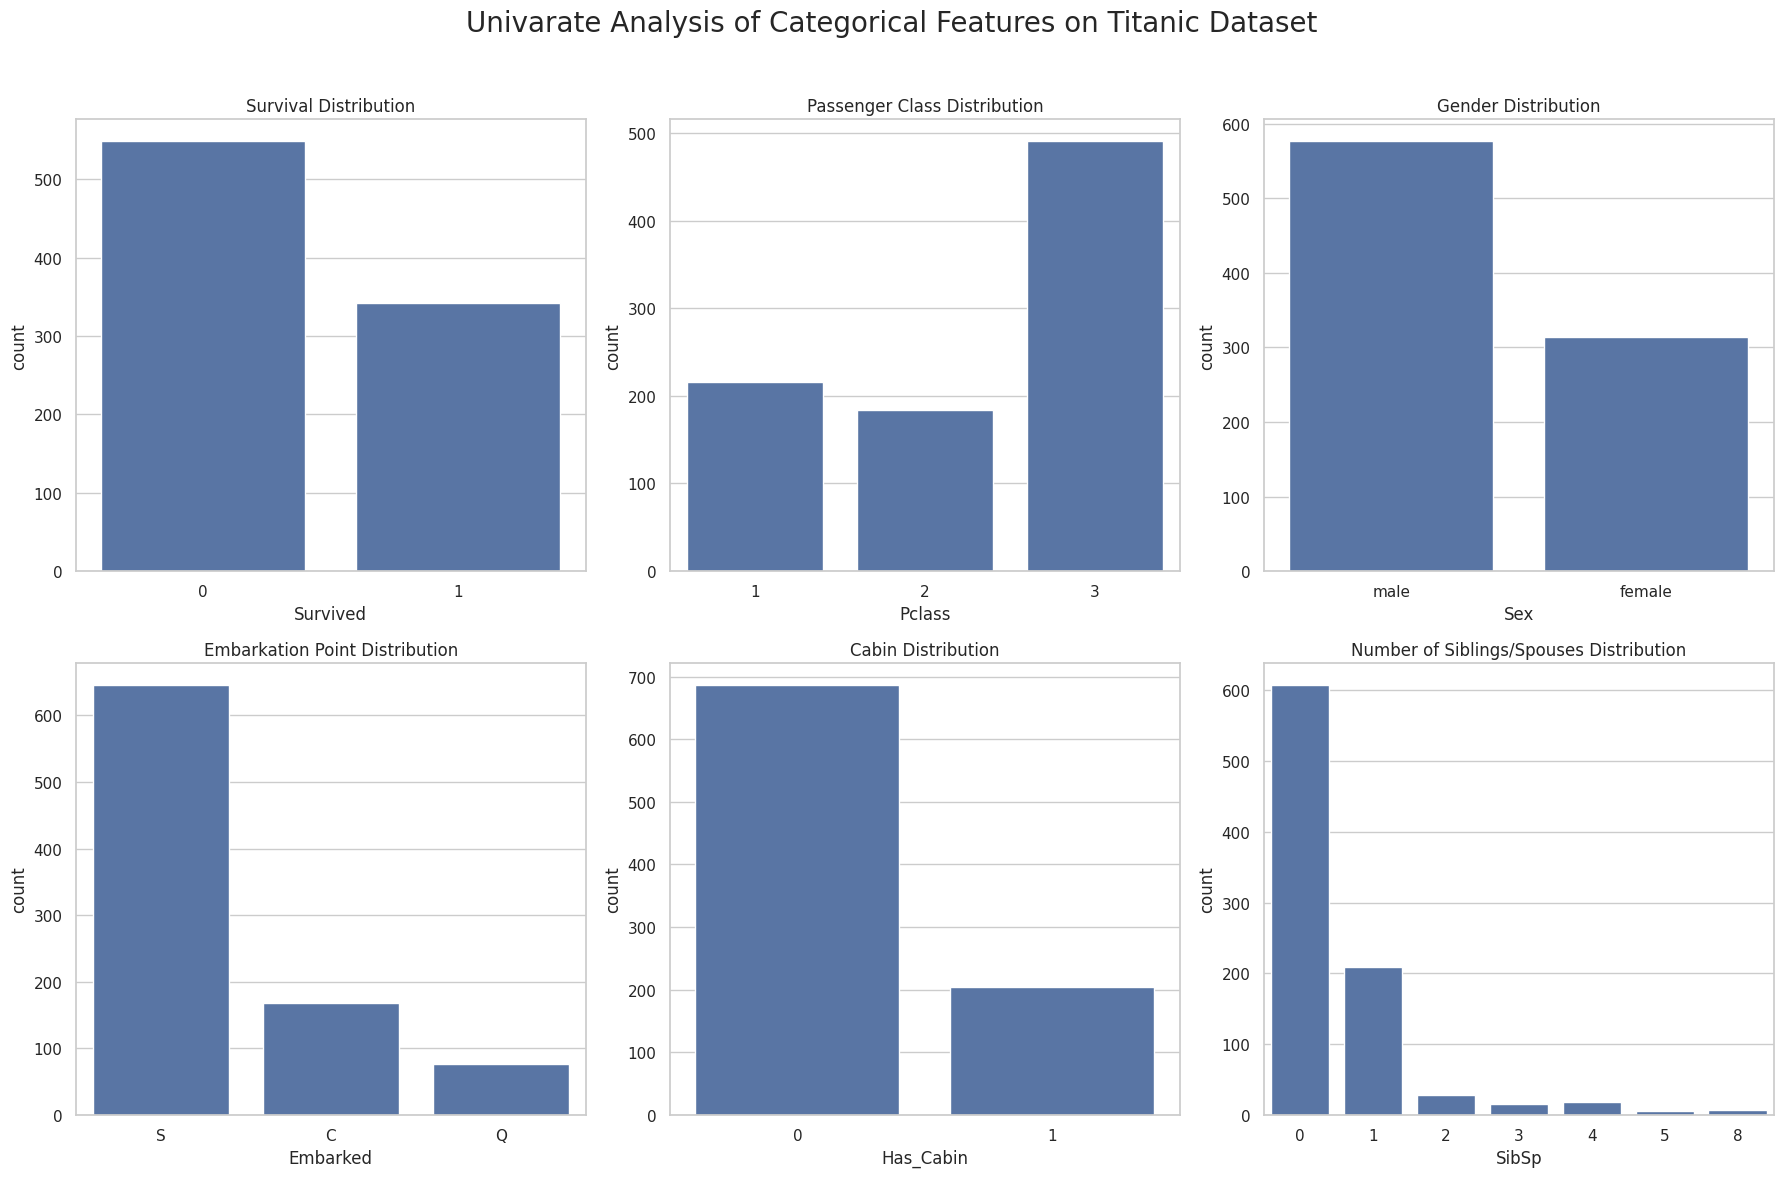

In [74]:
fig, axes = plt.subplots(2,3,figsize = (18,12))
fig.suptitle('Univarate Analysis of Categorical Features on Titanic Dataset', fontsize = 20)

sns.countplot(x = 'Survived', data = titanic_df, ax = axes[0,0])
axes[0,0].set_title('Survival Distribution')

sns.countplot(x = 'Pclass', data = titanic_df, ax = axes[0,1])
axes[0,1].set_title('Passenger Class Distribution')

sns.countplot(x = 'Sex', data = titanic_df, ax = axes[0,2])
axes[0,2].set_title('Gender Distribution')

sns.countplot(x = 'Embarked', data = titanic_df, ax = axes[1,0])
axes[1,0].set_title('Embarkation Point Distribution')

sns.countplot(x = 'Has_Cabin', data = titanic_df, ax = axes[1,1])
axes[1,1].set_title('Cabin Distribution')

sns.countplot(x = 'SibSp', data = titanic_df, ax = axes[1,2])
axes[1,2].set_title('Number of Siblings/Spouses Distribution')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

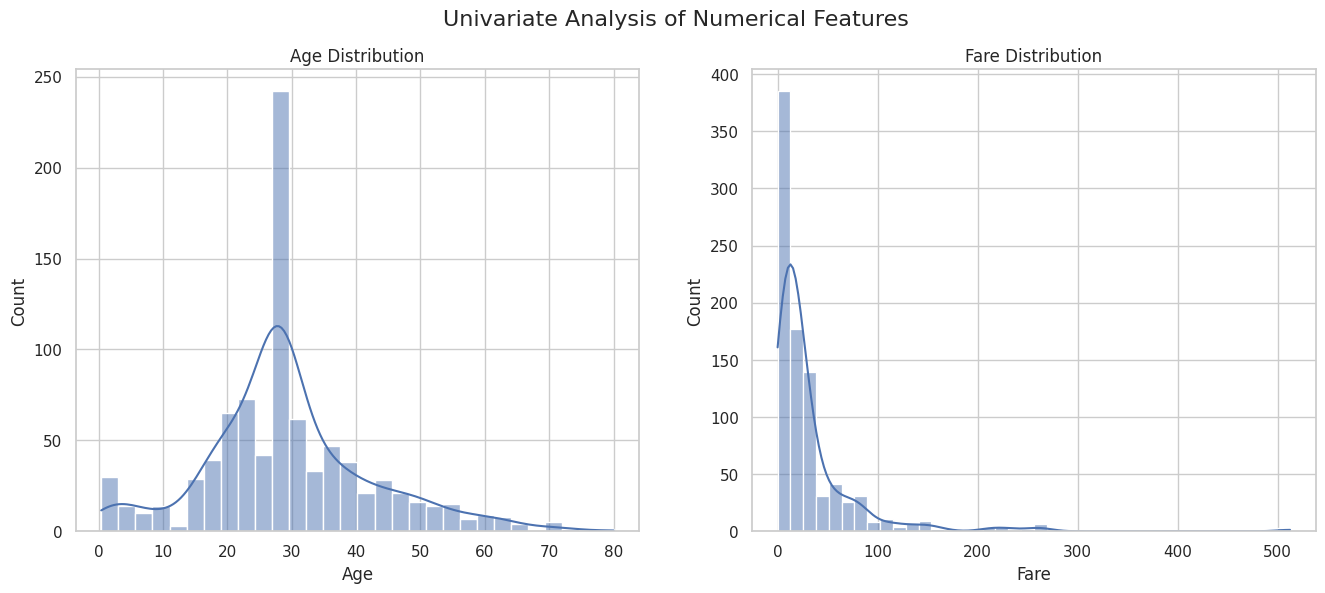

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Univariate Analysis of Numerical Features', fontsize=16)

# Plotting Age distribution
sns.histplot(ax=axes[0], data=titanic_df, x='Age', kde=True, bins=30).set_title('Age Distribution')

# Plotting Fare distribution
sns.histplot(ax=axes[1], data=titanic_df, x='Fare', kde=True, bins=40).set_title('Fare Distribution')

plt.show()

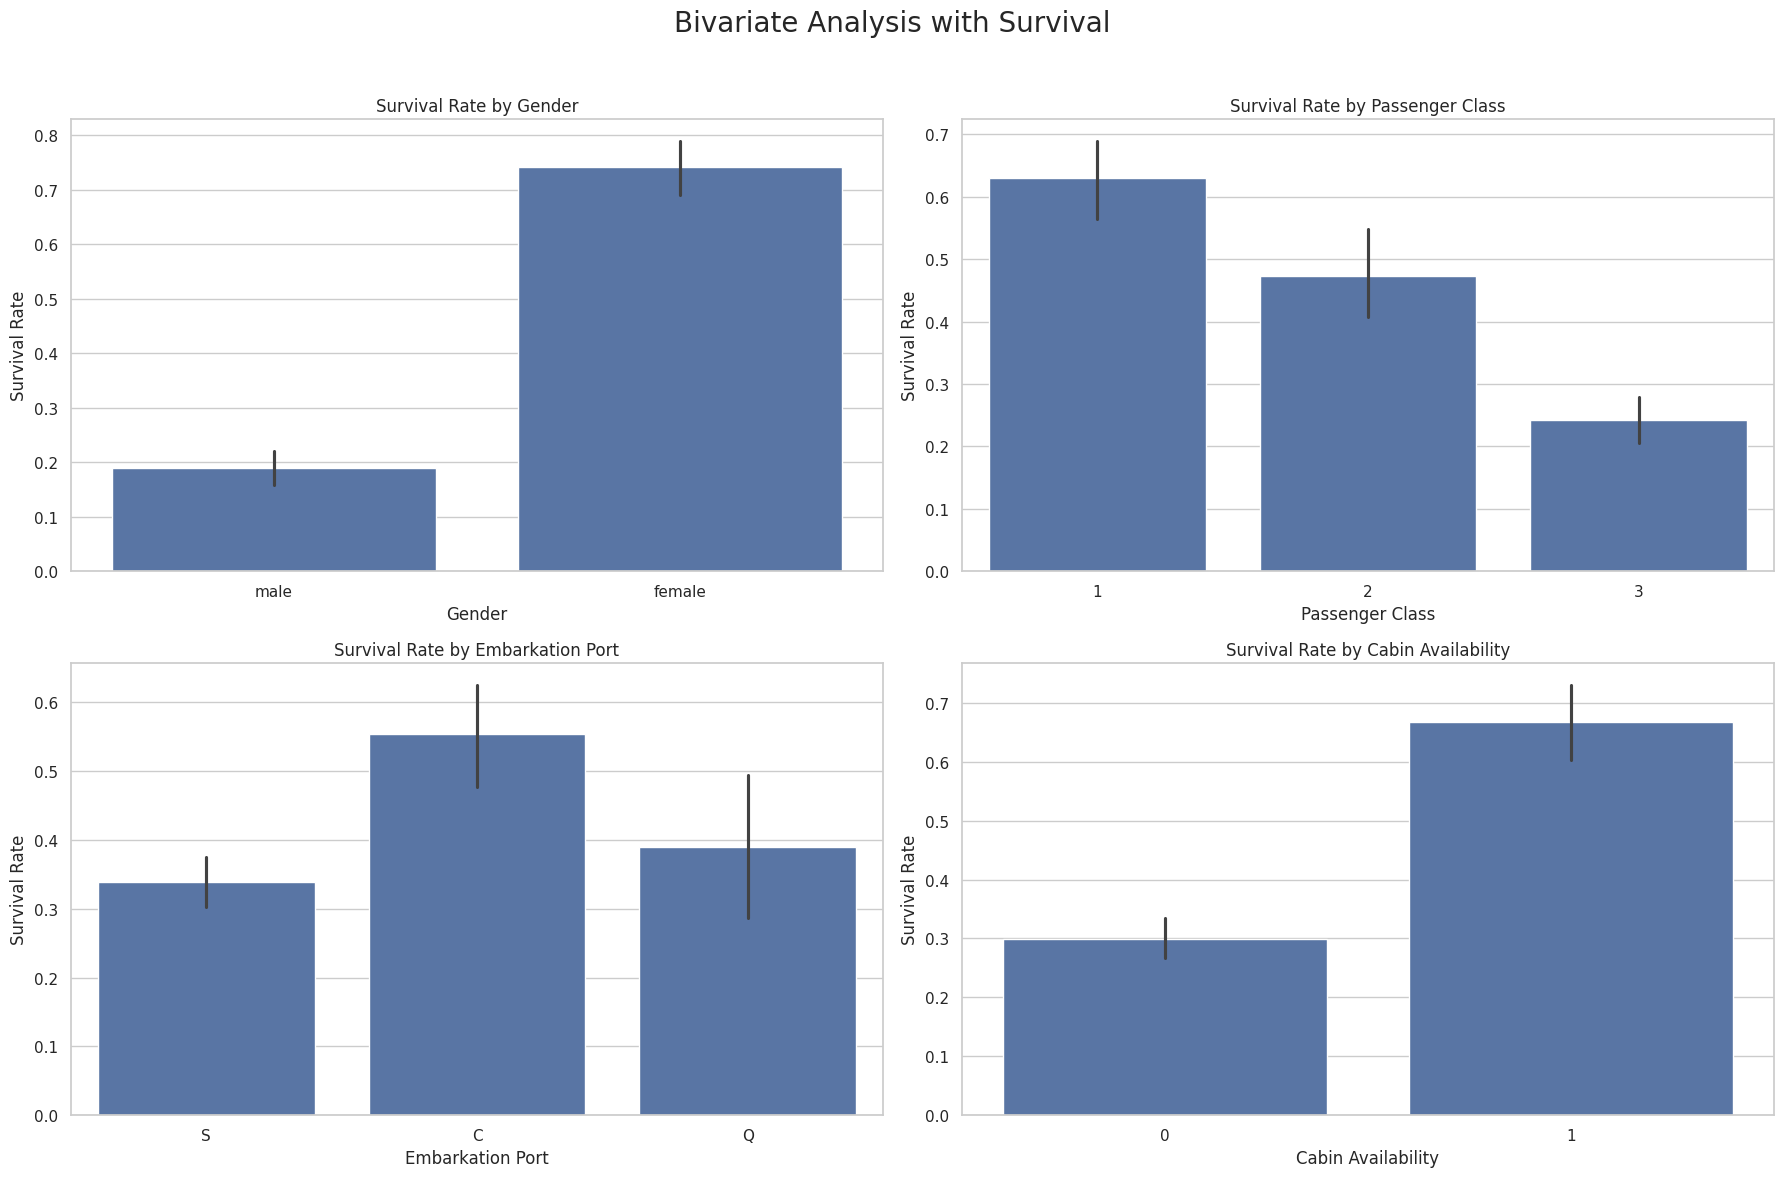

In [76]:
fig, axes = plt.subplots(2,2,figsize = (18,12))
fig.suptitle('Bivariate Analysis with Survival', fontsize = 20)

sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df, ax = axes[0,0])
axes[0,0].set_title('Survival Rate by Gender')
axes[0,0].set_xlabel('Gender')
axes[0,0].set_ylabel('Survival Rate')

sns.barplot(x = 'Pclass', y = 'Survived', data = titanic_df, ax = axes[0,1])
axes[0,1].set_title('Survival Rate by Passenger Class')
axes[0,1].set_xlabel('Passenger Class')
axes[0,1].set_ylabel('Survival Rate')

sns.barplot(x = 'Embarked', y = 'Survived', data = titanic_df, ax = axes[1,0])
axes[1,0].set_title('Survival Rate by Embarkation Port')
axes[1,0].set_xlabel('Embarkation Port')
axes[1,0].set_ylabel('Survival Rate')

sns.barplot(x = 'Has_Cabin', y = 'Survived', data = titanic_df, ax = axes[1,1])
axes[1,1].set_title('Survival Rate by Cabin Availability')
axes[1,1].set_xlabel('Cabin Availability')
axes[1,1].set_ylabel('Survival Rate')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()



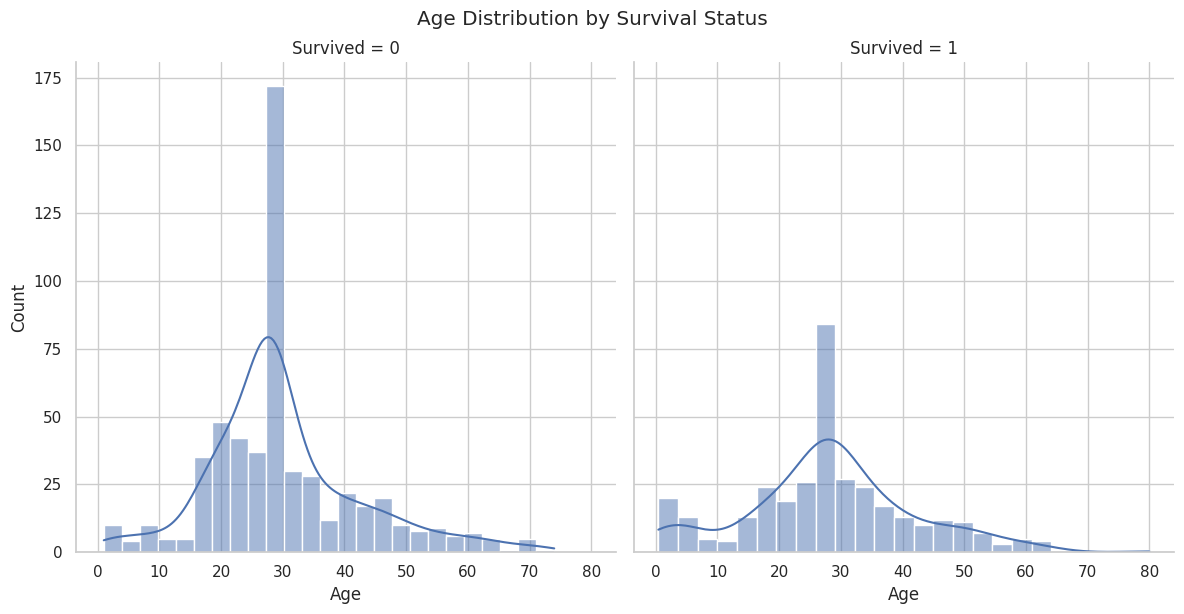

In [77]:
# Age vs. Survival
g = sns.FacetGrid(titanic_df, col='Survived', height=6)
g.map(sns.histplot, 'Age', bins=25, kde=True)
plt.suptitle('Age Distribution by Survival Status', y=1.02)
plt.show()

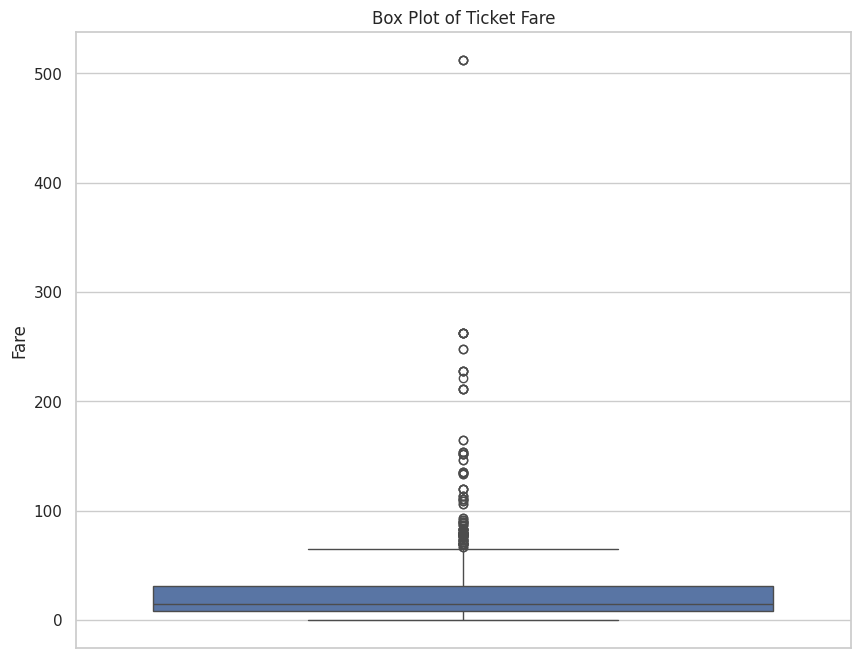

In [78]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Fare', data=titanic_df)
plt.title('Box Plot of Ticket Fare')
plt.ylabel('Fare')
plt.show()

Feature Engineering

In [80]:
# 1. Create a 'FamilySize' feature
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1 # +1 for the person themselves

# 2. Create an 'IsAlone' feature
titanic_df['IsAlone'] = 0
titanic_df.loc[titanic_df['FamilySize'] == 1, 'IsAlone'] = 1

print("Created 'FamilySize' and 'IsAlone' features:")
titanic_df[['FamilySize', 'IsAlone']].head()

Created 'FamilySize' and 'IsAlone' features:


,FamilySize,IsAlone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


Text(0.5, 0, 'Passenger Class')

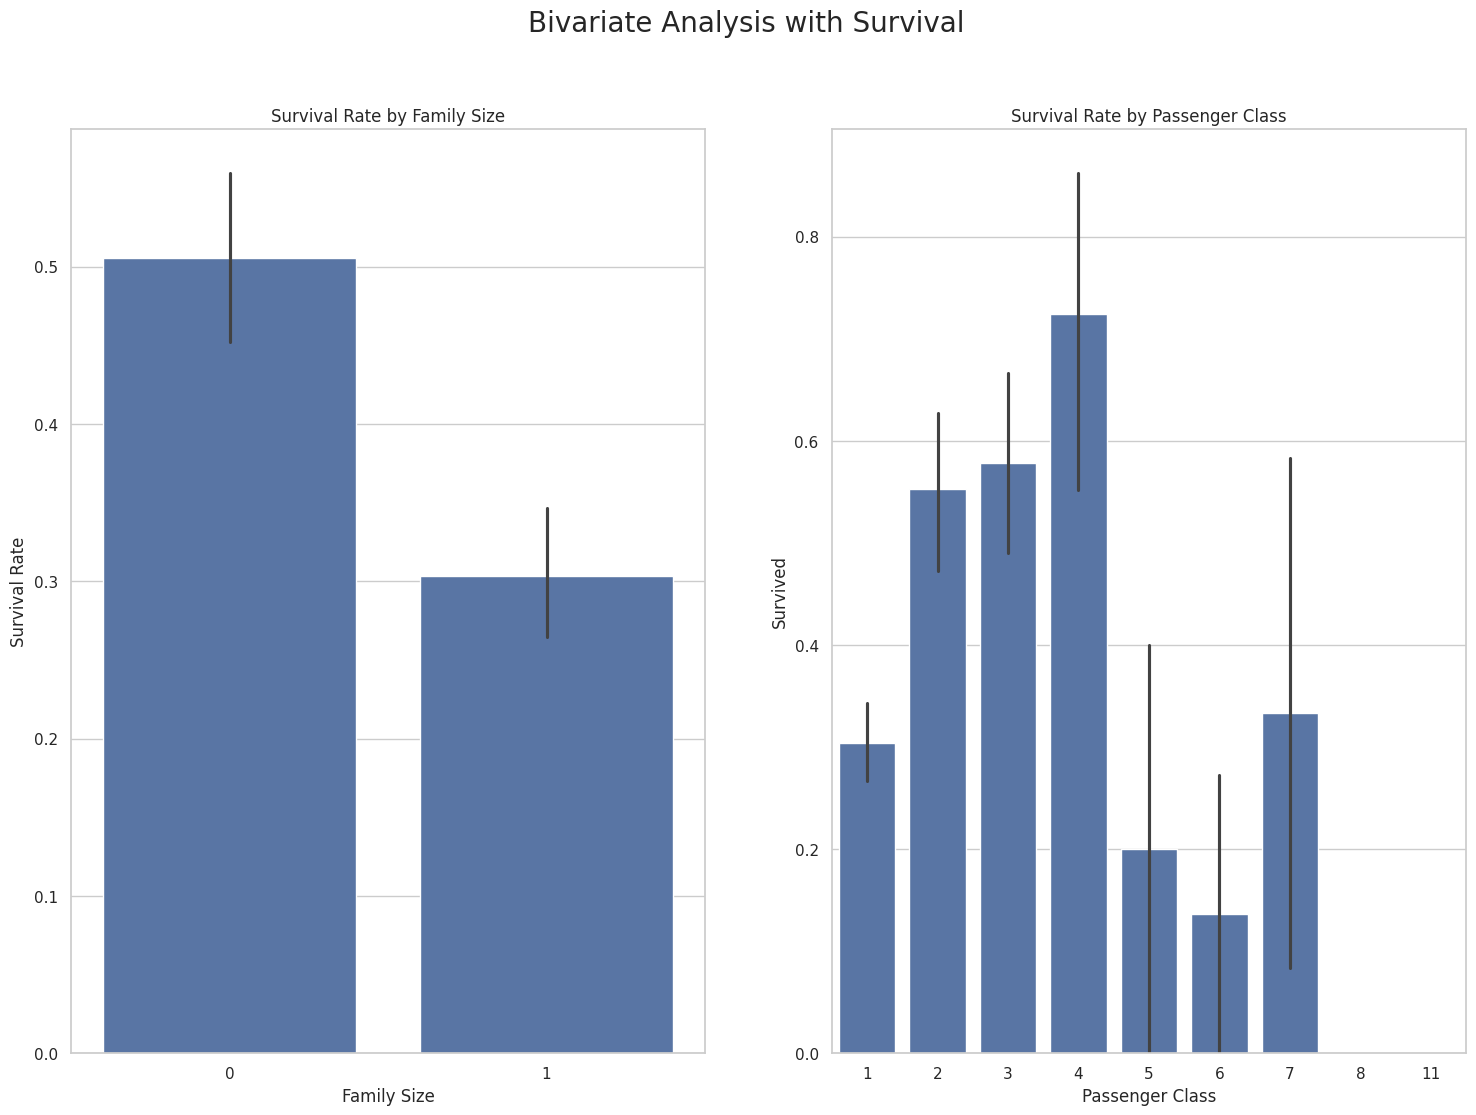

In [81]:
fig, axes = plt.subplots(1,2,figsize = (18,12))
fig.suptitle('Bivariate Analysis with Survival', fontsize = 20)

sns.barplot(ax=axes[0], x = 'IsAlone', y = 'Survived', data = titanic_df)
axes[0].set_title('Survival Rate by Family Size')
axes[0].set_xlabel('Family Size')
axes[0].set_ylabel('Survival Rate')

sns.barplot(ax=axes[1], x = 'FamilySize', y = 'Survived', data = titanic_df)
axes[1].set_title('Survival Rate by Passenger Class')
axes[1].set_xlabel('Passenger Class')

In [82]:
# 3. Extract 'Title' from the 'Name' column
titanic_df['Title'] = titanic_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Let's see the different titles
print("Extracted Titles:")
titanic_df['Title'].value_counts()

Extracted Titles:


,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


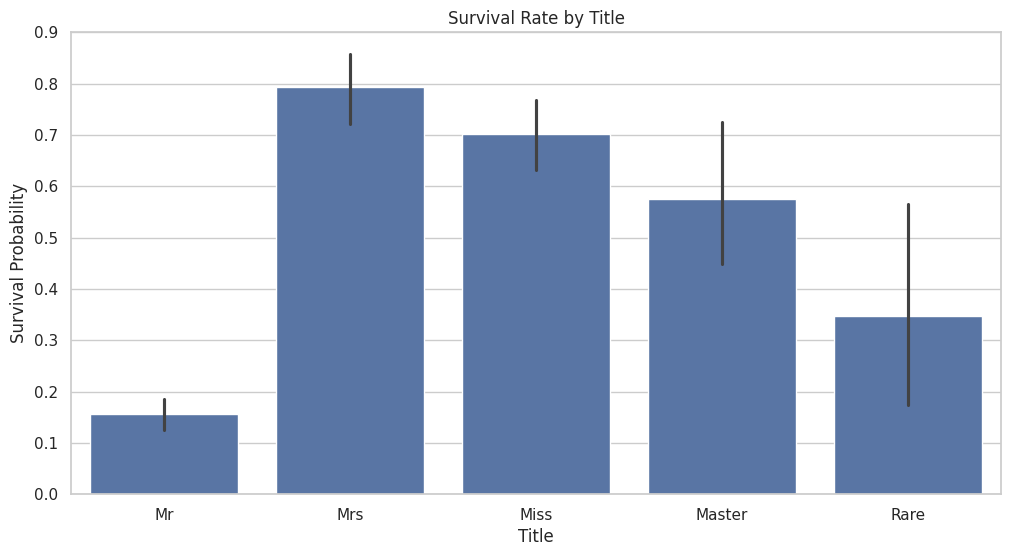

In [84]:
# Simplify the titles by grouping rare ones into a 'Rare' category
titanic_df['Title'] = titanic_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

titanic_df['Title'] = titanic_df['Title'].replace('Mlle', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Ms', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')

# Let's see the survival rate by the new, cleaned titles
plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Survived', data=titanic_df)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Probability')
plt.show()

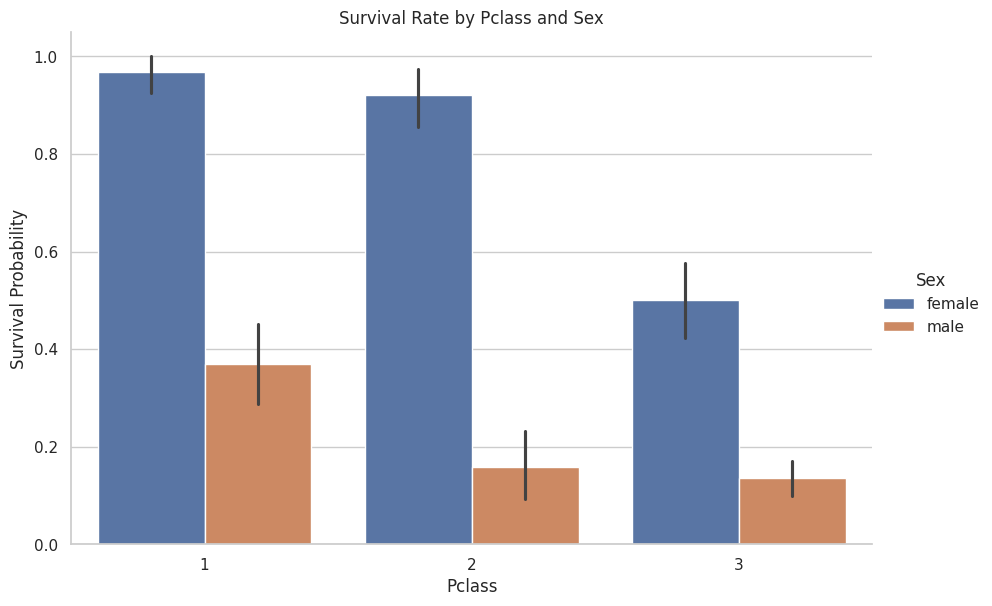

In [85]:
# Survival rate by Pclass and Sex
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df, kind='bar', height=6, aspect=1.5)
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel('Survival Probability')
plt.show()


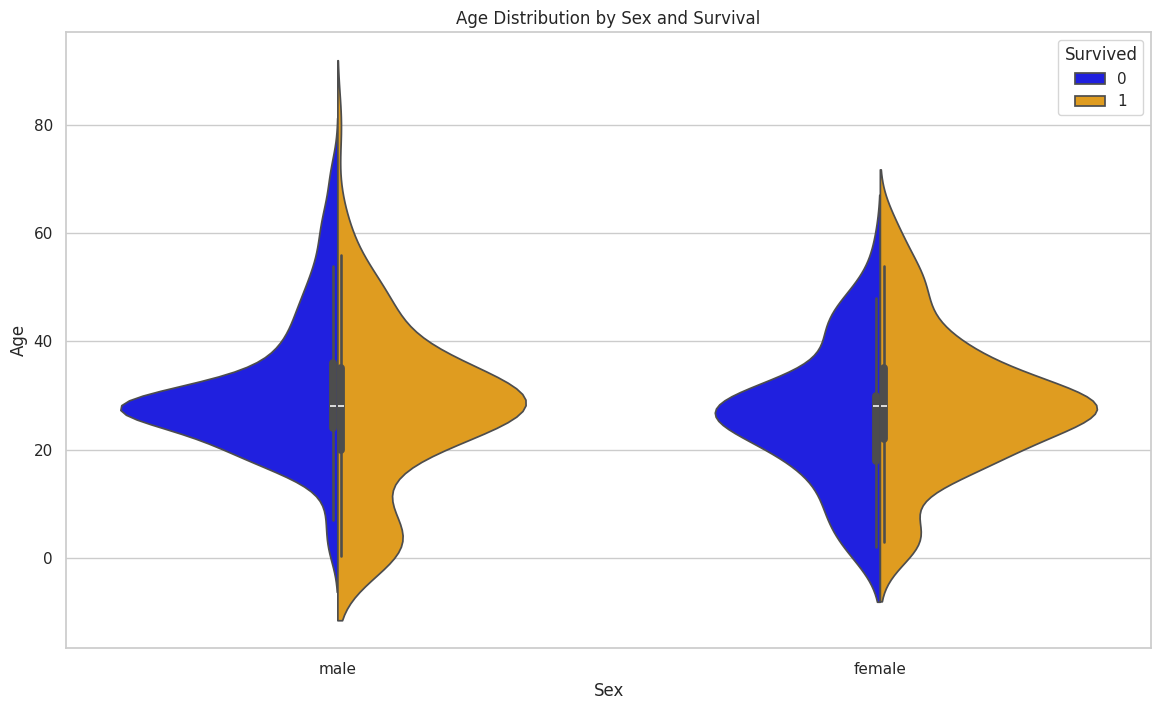

In [86]:
# Violin plot to see age distribution by sex and survival status
plt.figure(figsize=(14, 8))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=titanic_df, split=True, palette={0: 'blue', 1: 'orange'})
plt.title('Age Distribution by Sex and Survival')
plt.show()

Correlation Analysis

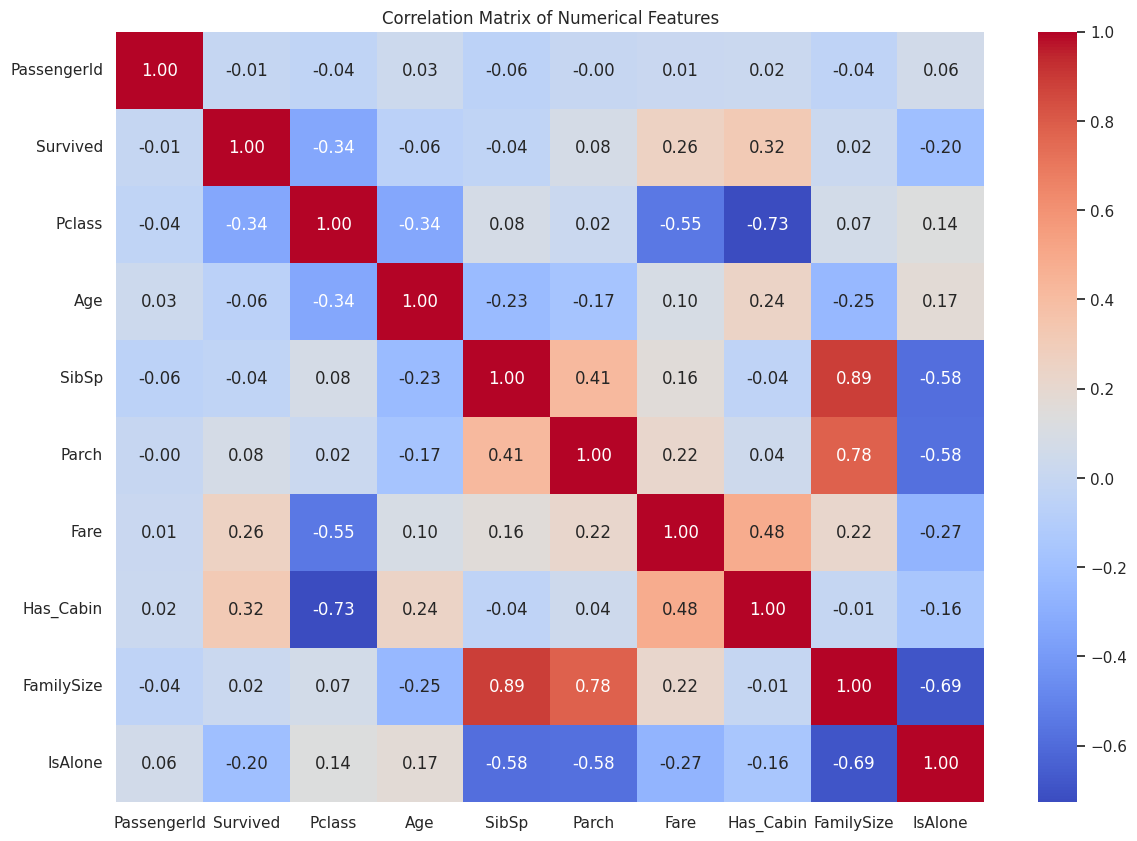

In [87]:
# Correlation Heatmap for numerical features
plt.figure(figsize=(14, 10))
numeric_cols = titanic_df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [88]:
import pandas as pd

# Create a sample DataFrame
sample_data = {'col1': [1, 2, 3, 4],
               'col2': ['A', 'B', 'C', 'D'],
               'col3': [True, False, True, False]}
sample_df = pd.DataFrame(sample_data)

# Display the sample DataFrame
print("Sample DataFrame:")
display(sample_df)

Sample DataFrame:


,col1,col2,col3
0,1,A,True
1,2,B,False
2,3,C,True
3,4,D,False


In [89]:
pip install ydata-profiling -q

In [90]:
# Generate the profiling report
from ydata_profiling import ProfileReport

profile = ProfileReport(sample_df, title="Titanic Dataset Profiling Report")

# Display the report in the notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 3/3 [00:00<00:00, 82.81it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [91]:
# Save the report to an HTML file
profile.to_file("EDA_rReport_on_Titanic_Dataset.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]